In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import gc
import logging
from pathlib import Path
PARENT_PATH = Path(os.getcwd()).parent.absolute()

import numpy as np
import pandas as pd
import torch

from dnn.config import DNNConfig
from dnn.data_access import DataClass
from dnn.features import Features
from dnn.model import Model

FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

##### Build config

In [3]:
config = DNNConfig()
config.CURRENT_PATH = PARENT_PATH

#### Parse raw data for pre-processing

In [4]:
data = DataClass(config)
data.make_dirs()
df = data.build()

2022-09-14 21:03:39,767 - dnn.data_access.fetch - INFO - Created model directory /home/vtyagi/repos/CS4771-Spring-2022-Regression-Competition/model
2022-09-14 21:03:39,769 - dnn.data_access.fetch - INFO - Created reports directory /home/vtyagi/repos/CS4771-Spring-2022-Regression-Competition/reports
2022-09-14 21:03:39,770 - dnn.data_access.fetch - INFO - Once unzipped, raw data will be available here: /home/vtyagi/repos/CS4771-Spring-2022-Regression-Competition/data/raw
2022-09-14 21:03:39,771 - dnn.data_access.fetch - INFO - Unpacking file {zip_file_path}
2022-09-14 21:03:40,622 - dnn.utils.utils - INFO - func:unzip took: 0.85 sec
2022-09-14 21:03:40,624 - dnn.data_access.fetch - INFO - Reading raw data into CSV for pre-processing
2022-09-14 21:03:41,620 - dnn.data_access.fetch - INFO - Splitting data available for model-building into train and validation sets
2022-09-14 21:03:48,710 - dnn.data_access.fetch - INFO - Saved CSV to /home/vtyagi/repos/CS4771-Spring-2022-Regression-Competi

#### Preprocess and build features

In [5]:
features = Features(config)
df_features = features.build(df)

2022-09-14 21:03:50,394 - dnn.features.features - INFO - Fitting processor on train set
2022-09-14 21:03:50,729 - dnn.utils.utils - INFO - func:fit took: 0.28 sec
2022-09-14 21:03:50,731 - dnn.features.features - INFO - Transforming data
2022-09-14 21:03:54,122 - dnn.utils.utils - INFO - func:transform took: 3.38 sec
2022-09-14 21:04:08,423 - dnn.utils.utils - INFO - func:build took: 19.44 sec


#### Train model

2022-09-14 21:04:10,334 - dnn.model.core - INFO - Training model
2022-09-14 21:04:10,360 - dnn.model.core - INFO - Number of features: 610
2022-09-14 21:04:10,361 - dnn.model.core - INFO - Number of training samples: 320000
2022-09-14 21:04:10,363 - dnn.model.core - INFO - Number of validation samples: 80000
EPOCH:1/10 - Training Loss: 433.9717, Validation Loss: 373.7418
EPOCH:2/10 - Training Loss: 351.9376, Validation Loss: 354.6288
EPOCH:3/10 - Training Loss: 342.6247, Validation Loss: 348.7178
EPOCH:4/10 - Training Loss: 338.3301, Validation Loss: 346.8193
EPOCH:5/10 - Training Loss: 335.5979, Validation Loss: 345.2113
EPOCH:6/10 - Training Loss: 333.0096, Validation Loss: 343.1216
EPOCH:7/10 - Training Loss: 330.9071, Validation Loss: 342.5406
EPOCH:8/10 - Training Loss: 329.7407, Validation Loss: 343.0512
EPOCH:9/10 - Training Loss: 328.3325, Validation Loss: 343.9968
EPOCH:10/10 - Training Loss: 327.0289, Validation Loss: 340.5990


AttributeError: 'Line2D' object has no property 'lable'

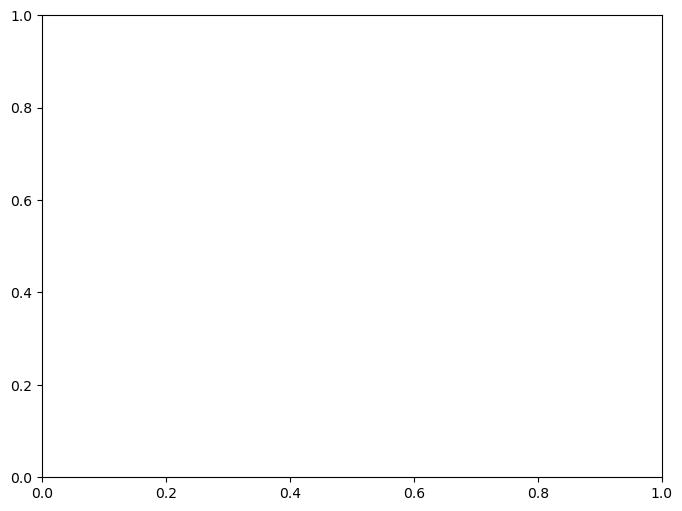

In [6]:
model = Model(config)
model.build(df_features)